In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

pd.options.display.max_rows = 100000

from sklearn.neighbors import NearestNeighbors

from time import time

In [2]:
df = pd.read_excel("C:/Users/GiorgosKelesiadis/Desktop/properties-clean-data.xlsx")
df.head()

index                                source  \
0      0                      Focus Properties   
1      1                              PANORAMA   
2      2                  Bardosis Real Estate   
3      3                              PANORAMA   
4      4  HK CAPITAL INVESTMENTS & REAL ESTATE   

                  postedByWebsite property_type  asking_price   m2  \
0  http://www.focusproperties.gr/     Apartment           550   50   
1                             NaN     Apartment           420   65   
2                             NaN     Apartment          1400  190   
3                             NaN     Apartment           360   80   
4        http://www.hkcapital.gr/     Apartment           790   90   

          floor  floor_numeric  bedroom  bathrooms  ...        creation_date  \
0             5            5.0        1          1  ...  2021-11-01 21:10:04   
1             4            4.0        2          1  ...  2021-11-01 21:10:40   
2  Ground floor            0.0        4          2  ...  2021-11-01 21:10:48   
3     Mezzanine            0.5        1          1  ...  2021-11-01 21:16:56   
4             2            2.0        2          1  ...  2021-11-01 21:17:00   

   offering_type            dtCreated  link_status            dtUpdated  \
0           rent  2021-11-01 21:10:04          404  2021-12-06 23:33:36   
1           rent  2021-11-01 21:10:40          404  2021-12-06 23:33:36   
2           rent  2021-11-01 21:10:48          404  2021-12-06 23:33:36   
3           rent  2021-11-01 21:16:56            0  2021-12-11 16:28:57   
4           rent  2021-11-01 21:17:00          404  2021-12-06 23:33:36   

    latitude  longitude                regions_mapping new_id  \
0  37.931190  23.706751               Palaiou Phalerou   9265   
1  38.006199  23.744480                      Athenaion  21228   
2        NaN        NaN  Bares - Boulas - Bouliagmenes  80802   
3  38.002892  23.741911                      Athenaion  37563   
4  37.888767  23.777824                      Gluphadas  45718   

  number_of_duplicates  
0                    1  
1                    1  
2                    1  
3                    1  
4                    8  

[5 rows x 35 columns]

In [3]:
df = df.drop(df.columns[[0]], axis=1)
df.head()

source                 postedByWebsite  \
0                      Focus Properties  http://www.focusproperties.gr/   
1                              PANORAMA                             NaN   
2                  Bardosis Real Estate                             NaN   
3                              PANORAMA                             NaN   
4  HK CAPITAL INVESTMENTS & REAL ESTATE        http://www.hkcapital.gr/   

  property_type  asking_price   m2         floor  floor_numeric  bedroom  \
0     Apartment           550   50             5            5.0        1   
1     Apartment           420   65             4            4.0        2   
2     Apartment          1400  190  Ground floor            0.0        4   
3     Apartment           360   80     Mezzanine            0.5        1   
4     Apartment           790   90             2            2.0        2   

   bathrooms parking  ...        creation_date  offering_type  \
0          1      No  ...  2021-11-01 21:10:04           rent   
1          1      No  ...  2021-11-01 21:10:40           rent   
2          2     Yes  ...  2021-11-01 21:10:48           rent   
3          1      No  ...  2021-11-01 21:16:56           rent   
4          1     Yes  ...  2021-11-01 21:17:00           rent   

             dtCreated link_status            dtUpdated   latitude  longitude  \
0  2021-11-01 21:10:04         404  2021-12-06 23:33:36  37.931190  23.706751   
1  2021-11-01 21:10:40         404  2021-12-06 23:33:36  38.006199  23.744480   
2  2021-11-01 21:10:48         404  2021-12-06 23:33:36        NaN        NaN   
3  2021-11-01 21:16:56           0  2021-12-11 16:28:57  38.002892  23.741911   
4  2021-11-01 21:17:00         404  2021-12-06 23:33:36  37.888767  23.777824   

                 regions_mapping new_id number_of_duplicates  
0               Palaiou Phalerou   9265                    1  
1                      Athenaion  21228                    1  
2  Bares - Boulas - Bouliagmenes  80802                    1  
3                      Athenaion  37563                    1  
4                      Gluphadas  45718                    8  

[5 rows x 34 columns]

In [4]:
list(df.columns)

['source',
 'postedByWebsite',
 'property_type',
 'asking_price',
 'm2',
 'floor',
 'floor_numeric',
 'bedroom',
 'bathrooms',
 'parking',
 'renovated',
 'new_development',
 'top_floor',
 'build_year',
 'sp_region',
 'sp_area',
 'sp_hood',
 'prosperty_region',
 'prosperty_area',
 'prosperty_hood',
 'url',
 'firstPublished',
 'telephone',
 'listingCode',
 'creation_date',
 'offering_type',
 'dtCreated',
 'link_status',
 'dtUpdated',
 'latitude',
 'longitude',
 'regions_mapping',
 'new_id',
 'number_of_duplicates']

In [5]:
df.dtypes

source                   object
postedByWebsite          object
property_type            object
asking_price              int64
m2                        int64
floor                    object
floor_numeric           float64
bedroom                   int64
bathrooms                 int64
parking                  object
renovated                 int64
new_development           int64
top_floor                 int64
build_year               object
sp_region                object
sp_area                  object
sp_hood                  object
prosperty_region         object
prosperty_area           object
prosperty_hood           object
url                      object
firstPublished           object
telephone                object
listingCode              object
creation_date            object
offering_type            object
dtCreated                object
link_status               int64
dtUpdated                object
latitude                float64
longitude               float64
regions_

In [6]:
df = df.drop(['source', 'postedByWebsite', 'sp_region', 'sp_area', 'sp_hood', 'prosperty_region', 'prosperty_area', 'prosperty_hood', 'url', 'firstPublished', 'telephone', 'listingCode', 'creation_date', 'dtCreated', 'dtUpdated', 'regions_mapping' , 'parking', 'floor'], axis=1)
# df = df.drop(['property_type', 'offering_type', 'build_year'], axis=1)

In [7]:
df.dtypes

property_type            object
asking_price              int64
m2                        int64
floor_numeric           float64
bedroom                   int64
bathrooms                 int64
renovated                 int64
new_development           int64
top_floor                 int64
build_year               object
offering_type            object
link_status               int64
latitude                float64
longitude               float64
new_id                    int64
number_of_duplicates      int64
dtype: object

In [8]:
df = pd.get_dummies(df, columns=['property_type', 'build_year', 'offering_type'])

In [9]:
df = df.apply(lambda x: x.fillna(x.mode()), axis=0)
df['latitude'].fillna(df['latitude'].median(), inplace=True)
df['longitude'].fillna(df['longitude'].median(), inplace=True)
df = df.dropna()

In [10]:
df.head()

asking_price   m2  floor_numeric  bedroom  bathrooms  renovated  \
0           550   50            5.0        1          1          1   
1           420   65            4.0        2          1          0   
2          1400  190            0.0        4          2          1   
3           360   80            0.5        1          1          0   
4           790   90            2.0        2          1          0   

   new_development  top_floor  link_status   latitude  ...  build_year_2016  \
0                0          0          404  37.931190  ...                0   
1                0          1          404  38.006199  ...                0   
2                0          0          404  37.993065  ...                0   
3                0          0            0  38.002892  ...                0   
4                0          0          404  37.888767  ...                0   

   build_year_2017  build_year_2018  build_year_2019  build_year_2020  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   build_year_2021  build_year_2022  build_year_2023  offering_type_rent  \
0                0                0                0                   1   
1                0                0                0                   1   
2                0                0                0                   1   
3                0                0                0                   1   
4                0                0                0                   1   

   offering_type_sale  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 123 columns]

In [11]:
df.tail()

asking_price   m2  floor_numeric  bedroom  bathrooms  renovated  \
9995           360   45            0.0        1          1          0   
9996           400   48            1.0        1          1          0   
9997           620  127            1.0        2          1          1   
9998           820  100            3.0        3          2          0   
9999           450   35            5.0        1          1          1   

      new_development  top_floor  link_status   latitude  ...  \
9995                0          0          404  40.633781  ...   
9996                0          0          404  40.613789  ...   
9997                0          0          200  40.597641  ...   
9998                0          0          404  38.072636  ...   
9999                0          0            0  40.640190  ...   

      build_year_2016  build_year_2017  build_year_2018  build_year_2019  \
9995                0                0                0                0   
9996                0                0                0                0   
9997                0                0                0                0   
9998                0                0                0                0   
9999                0                0                0                0   

      build_year_2020  build_year_2021  build_year_2022  build_year_2023  \
9995                0                0                0                0   
9996                0                0                0                0   
9997                0                0                0                0   
9998                0                0                0                0   
9999                0                0                0                0   

      offering_type_rent  offering_type_sale  
9995                   1                   0  
9996                   1                   0  
9997                   1                   0  
9998                   1                   0  
9999                   1                   0  

[5 rows x 123 columns]

C:\Users\GiorgosKelesiadis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\GiorgosKelesiadis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\GiorgosKelesiadis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


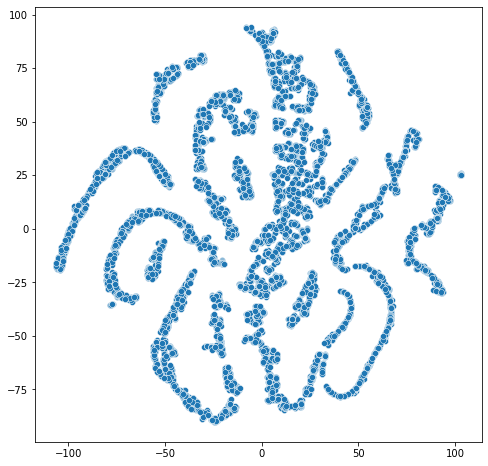

In [12]:
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(df)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

In [13]:
n = len(df.index)
similar_properties_number = 20
n_clusters = n / similar_properties_number
n_clusters = int(n_clusters)

In [ ]:
#start_time = time()
#kmeans = KMeans(n_clusters = n_clusters)
#df["Cluster"] = kmeans.fit_predict(df)
#print(time()-start_time)

In [14]:
kmeans = KMeans(n_clusters = n_clusters)

In [15]:
df["Cluster"] = kmeans.fit_predict(df)

In [16]:
df["Cluster"] = df["Cluster"].astype("category")

In [17]:
df.head(20)

asking_price   m2  floor_numeric  bedroom  bathrooms  renovated  \
0            550   50            5.0        1          1          1   
1            420   65            4.0        2          1          0   
2           1400  190            0.0        4          2          1   
3            360   80            0.5        1          1          0   
4            790   90            2.0        2          1          0   
5            740   79            6.0        2          1          0   
6            300   40            0.0        1          1          0   
7            670   55            0.5        1          1          0   
8            650   50            5.0        1          1          1   
9           3000  191            0.0        3          2          0   
10           280   45            3.0        1          1          1   
11           400   60            5.0        2          1          1   
12           600   78            1.0        2          1          0   
13           770   82            4.0        2          1          1   
14           750   90            0.0        2          1          0   
15           850  120            4.0        3          2          1   
16           900   90            0.0        2          1          1   
17          1250  110            2.0        3          2          0   
18           800   71            4.0        2          1          0   
19           800   90            1.0        2          1          1   

    new_development  top_floor  link_status   latitude  ...  build_year_2017  \
0                 0          0          404  37.931190  ...                0   
1                 0          1          404  38.006199  ...                0   
2                 0          0          404  37.993065  ...                0   
3                 0          0            0  38.002892  ...                0   
4                 0          0          404  37.888767  ...                0   
5                 1          0          404  37.999619  ...                0   
6                 0          0          404  35.510895  ...                0   
7                 1          0            0  35.321701  ...                0   
8                 0          1          404  37.885025  ...                0   
9                 1          0          404  38.016613  ...                0   
10                0          0            0  35.310120  ...                0   
11                0          0          404  37.987404  ...                0   
12                0          0          404  37.993065  ...                0   
13                0          0            0  38.055450  ...                0   
14                0          0          404  37.993065  ...                0   
15                0          1            0  37.943550  ...                0   
16                0          0            0  37.871658  ...                0   
17                1          1            0  35.321701  ...                0   
18                0          0          404  37.906631  ...                0   
19                0          0            0  40.594093  ...                0   

    build_year_2018  build_year_2019  build_year_2020  build_year_2021  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
5                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                1   
8                 0                0                0                0   
9                 0                0                1                0   
10               

In [18]:
df.tail(20)

asking_price   m2  floor_numeric  bedroom  bathrooms  renovated  \
9979          5500  270            2.0        3          2          0   
9980           320   40            1.0        1          1          0   
9981           650  115            0.0        2          1          0   
9982          1100   87            2.0        2          1          0   
9983           400   46            2.0        1          0          0   
9984           690   62            0.0        1          1          1   
9985           300   45            1.0        1          1          0   
9986           280   63            0.5        1          1          0   
9987          1000   90            1.0        2          1          0   
9988           700  110            0.0        2          1          0   
9989           380   50            2.0        1          0          0   
9990           410  100            3.0        2          2          0   
9991          1200  154            2.0        3          2          1   
9993          1300  170            0.0        3          2          0   
9994          1150  115            2.0        3          1          0   
9995           360   45            0.0        1          1          0   
9996           400   48            1.0        1          1          0   
9997           620  127            1.0        2          1          1   
9998           820  100            3.0        3          2          0   
9999           450   35            5.0        1          1          1   

      new_development  top_floor  link_status   latitude  ...  \
9979                0          1            0  37.972130  ...   
9980                0          0          404  40.666122  ...   
9981                0          0          404  38.037533  ...   
9982                0          0          404  37.863419  ...   
9983                0          0            0  37.993065  ...   
9984                0          0            0  37.876091  ...   
9985                0          0          404  40.669048  ...   
9986                0          0          404  40.652660  ...   
9987                0          0          404  37.909519  ...   
9988                1          0          404  35.528351  ...   
9989                0          0            0  35.334682  ...   
9990                0          1          404  37.964668  ...   
9991                0          0            0  37.993065  ...   
9993                0          0            0  35.307167  ...   
9994                0          0            0  37.846218  ...   
9995                0          0          404  40.633781  ...   
9996                0          0          404  40.613789  ...   
9997                0          0          200  40.597641  ...   
9998                0          0          404  38.072636  ...   
9999                0          0            0  40.640190  ...   

      build_year_2017  build_year_2018  build_year_2019  build_year_2020  \
9979                0                0                0                0   
9980                0                0                0                0   
9981                0                0                0                0   
9982                0                0                0                0   
9983                0                0                0                0   
9984                0                0                0                0   
9985                0                0                0                0   
9986                0                0                0                0   
9987                0                0                0                0   
9988                0                0                0                0   
9989                0                0                0                0   
9990                0                0                0                0   
9991                0                0                0                0   
9993                0                0    

In [ ]:
#neigh = NearestNeighbors(n_neighbors=40)

In [ ]:
#neigh.fit(df)

In [ ]:
#print(neigh.kneighbors(df))

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
#cosine_similarity(df)